In [1]:
from clases import *
import networkx as nx
import matplotlib.pyplot as plt

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


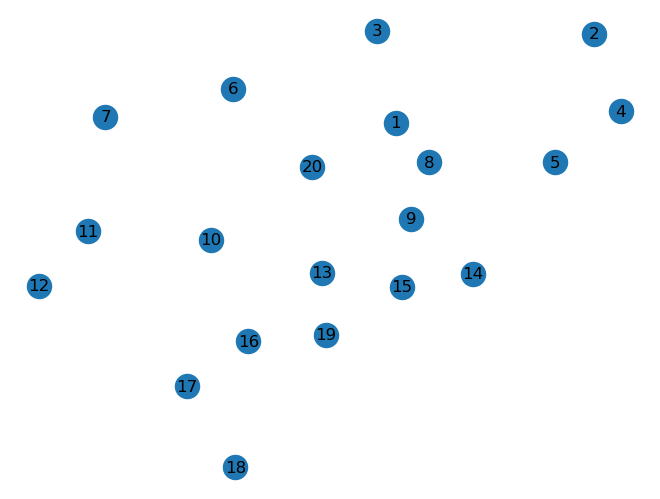

In [2]:
g=nx.Graph()
verices=[x for x in range(21) if x>0]
print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}
g.add_nodes_from(verices)
nx.draw(g,pos=cor,with_labels=True)

In [3]:
ls_estacion=[]
for x in cor:
    est=punto_de_carga(x,cor[x],1,6,1)
    ls_estacion.append(est)
    print(est)
print(ls_estacion)
for n in ls_estacion:
    print(n)

id:1
pocicion:(35.1492269880214, 65.3176294810345)
carga:100%
fila:[]
id:2
pocicion:(42.9724164192492, 75.0698245254417)
carga:100%
fila:[]
id:3
pocicion:(34.3980793893049, 75.4042635113762)
carga:100%
fila:[]
id:4
pocicion:(44.0440862043489, 66.6036332231541)
carga:100%
fila:[]
id:5
pocicion:(41.4380745566023, 60.9961554850301)
carga:100%
fila:[]
id:6
pocicion:(28.7366803299595, 69.0267144154237)
carga:100%
fila:[]
id:7
pocicion:(23.6970948787431, 65.9537964573649)
carga:100%
fila:[]
id:8
pocicion:(36.4613286827247, 60.9950257108086)
carga:100%
fila:[]
id:9
pocicion:(35.7696406949538, 54.7698338208705)
carga:100%
fila:[]
id:10
pocicion:(27.8481227768708, 52.5084638163694)
carga:100%
fila:[]
id:11
pocicion:(22.9976103016368, 53.4179349054758)
carga:100%
fila:[]
id:12
pocicion:(21.07761578019, 47.4558466546674)
carga:100%
fila:[]
id:13
pocicion:(32.2380243618015, 48.8581137773572)
carga:100%
fila:[]
id:14
pocicion:(38.1896814766809, 48.7563760488977)
carga:100%
fila:[]
id:15
pocicion:(3

In [4]:
def crear_carros(n,est,i):
    carros=[]
    for x in range(n):
        cor=cord_rand(est.posicion,2)
        car=carro(chr(x+97+i),cor,(rn.triangular(0.25, 1,0.75)),10000,50,est)
        carros.append(car)
    return carros 

In [5]:
ls_carros=[]

i=0
for e in ls_estacion:
    ls_carros=ls_carros+crear_carros(10,e,i)
    i=i+10


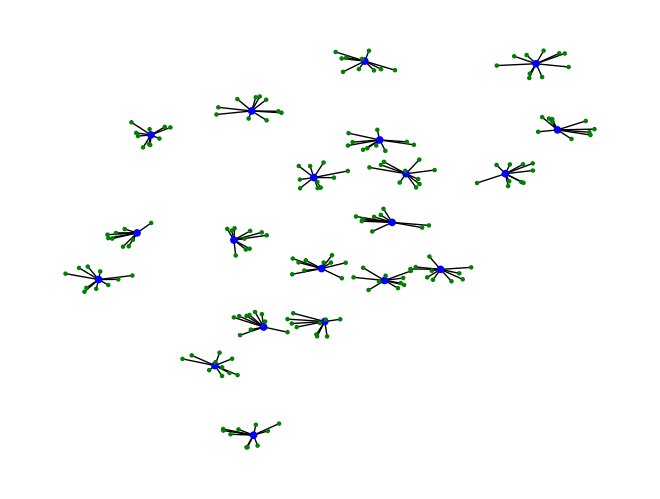

In [6]:
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)

--------------------


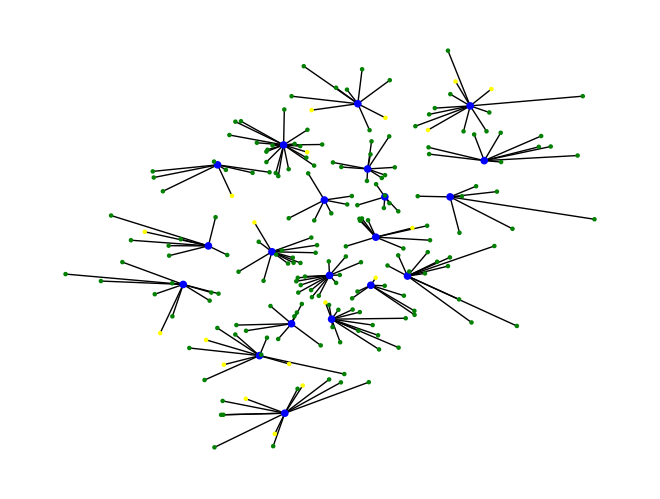

In [7]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())


--------------------


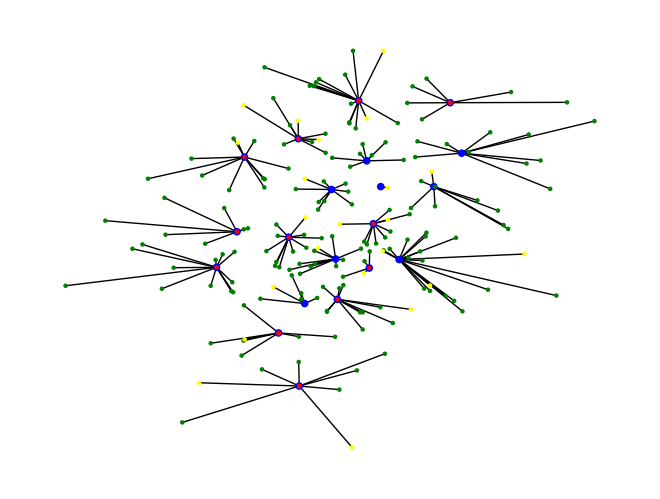

In [8]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())

--------------------


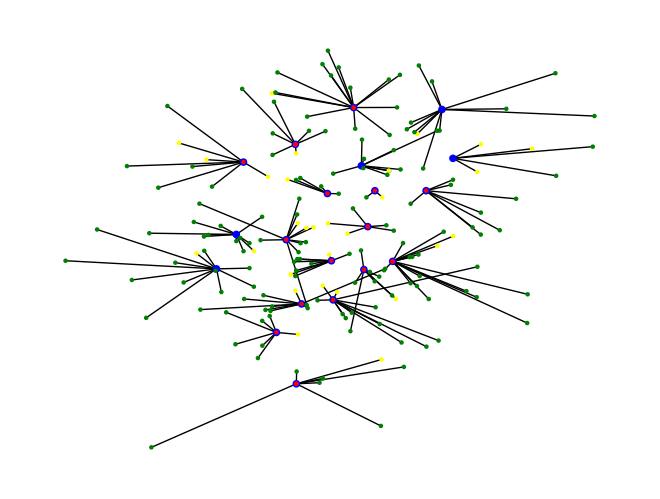

In [9]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())

--------------------


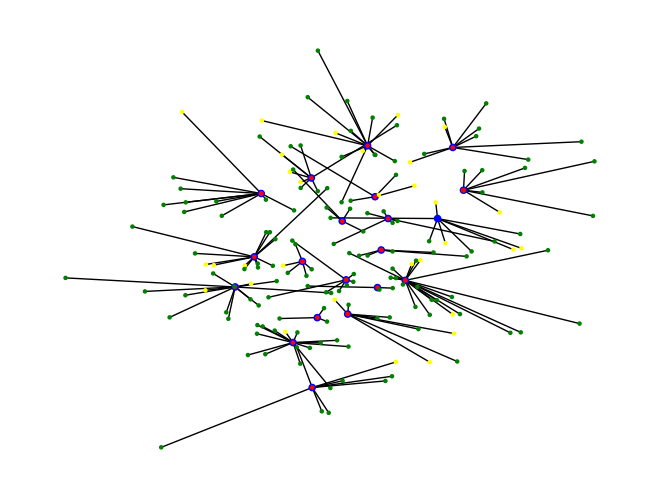

In [10]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())

--------------------


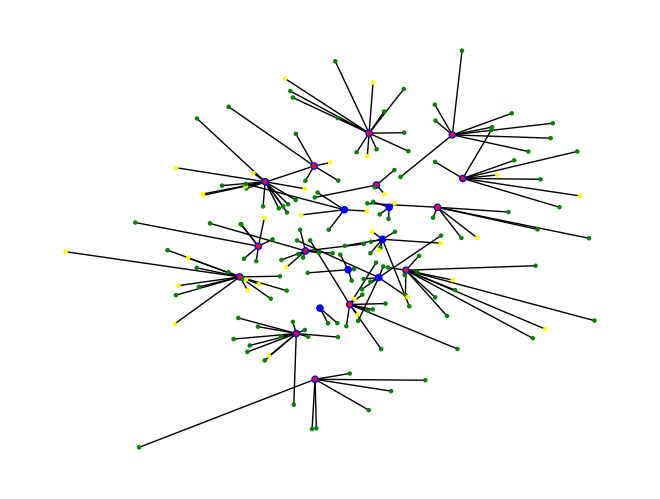

In [11]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())

--------------------


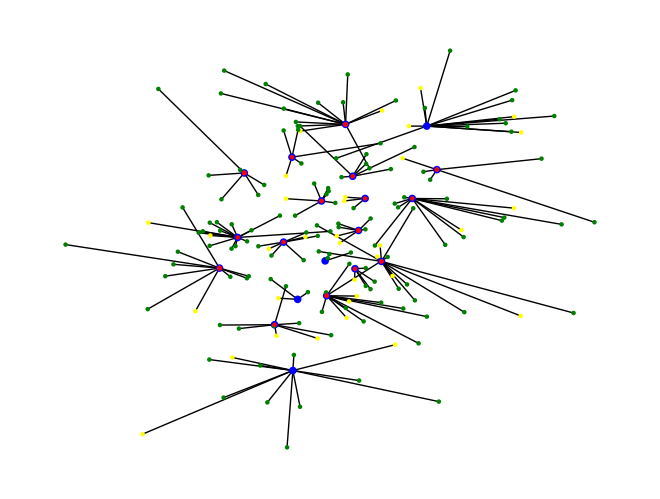

In [12]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())

--------------------


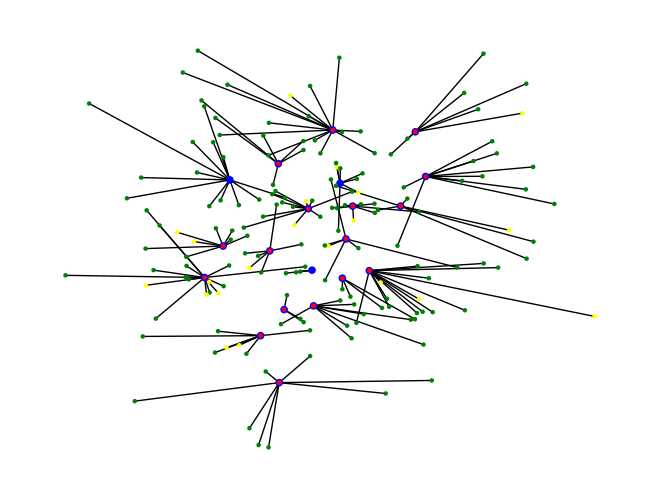

In [13]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())

--------------------


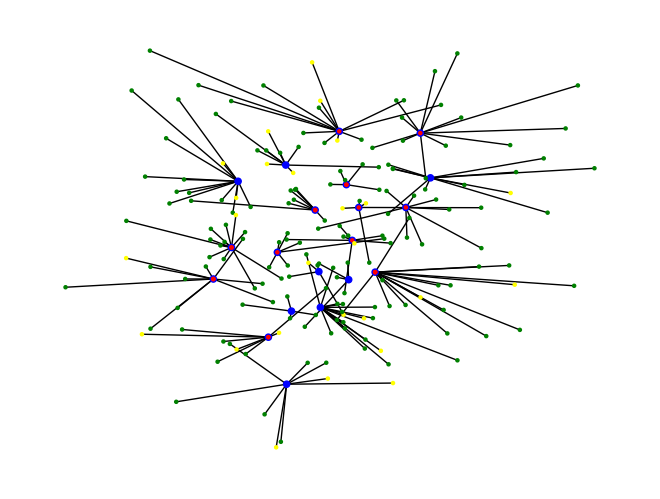

In [14]:
for x in ls_carros:
    if x.estado=='ir a cargar':
        x.ir_cargador()
        x.estacion.cargar(x)
        #print(x.estacion)
        continue
    x.moverse()
    x.buscar_cargador(ls_estacion)
    if x.carga <= 0.25 or rn.randint(0,9)==4:
        x.estado='ir a cargar'
for e in ls_estacion:
    e.cargar2()
print('--------------------')
g=nx.Graph()
vertices=[x for x in range(21) if x>0]
for n in vertices:
    g.add_node(n,tp='estacion')
#print(verices)
cor = {1:(35.1492269880214,65.3176294810345), 2:(42.9724164192492,75.0698245254417), 
       3:(34.3980793893049,75.4042635113762), 4:(44.0440862043489,66.6036332231541), 
       5:(41.4380745566023,60.9961554850301), 6:(28.7366803299595,69.0267144154237), 
       7:(23.6970948787431,65.9537964573649), 8:(36.4613286827247,60.9950257108086), 
       9:(35.7696406949538,54.7698338208705), 10:(27.8481227768708,52.5084638163694), 
       11:(22.9976103016368,53.4179349054758), 12:(21.07761578019,47.4558466546674), 
       13:(32.2380243618015,48.8581137773572), 14:(38.1896814766809,48.7563760488977), 
       15:(35.3918939440453,47.332047850465), 16:(29.3384991007064,41.3803907355856), 
       17:(26.8967936176789,36.4461109053009), 18:(28.829810458409,27.5440596650965), 
       19:(32.3983839249809,42.0878691929988),20:(31.8481227768708,60.5084638163694)}


aristas=[]
for x in ls_carros:
    g.add_node(x.id,tp=x.estado)
    cor.update({x.id:x.posicion})
    y=(x.id,x.estacion.id)
    aristas.append(y)
#print(aristas)
#print(cor)


color_map=nx.get_node_attributes(g,'tp')

for k in color_map:
    if color_map[k]=='estacion':
        color_map[k]='blue'
    if color_map[k]=='andando':
        color_map[k]='green'
    if color_map[k]=='ir a cargar':
        color_map[k]='yellow'
    if color_map[k]=='cargando' or color_map[k]=='enfila':
        color_map[k]='red'
        
cl=[color_map.get(node) for node in g.nodes()]

size_map=nx.get_node_attributes(g,'tp')

for k in size_map:
    if size_map[k]=='estacion':
        size_map[k]=20
    else:
        size_map[k]=5
zl=[size_map.get(node) for node in g.nodes()]

g.add_edges_from(aristas)
nx.draw(g,pos=cor,node_color=cl,node_size=zl)
#list(g.degree())